# MINI PROJECT 

Singapore TOTO

In [6]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [7]:
Data = pd.read_csv('Toto Winning Numbers.csv')
print("Data type : ", type(Data))
print("Data dims : ", Data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1426, 31)


The Description of the Data is as follow: 

Draw - The nth lottery draw

Date - Date of lottery draw

Winning Number N - The nth winning number

Additional Number - The winning additional/bonus number

From Last - Numbers that reappeared on current draw (n) and n-1 draw

Odd - Number of odd numbers in current draw

Even - Number of even numbers in current draw

Division n Winners - Number of winners (people who got the winning numbers in the respective division)

Division n Prize - Monetary Prize pool (SGD) given to the winner (if there are no winner, will be 0 and amount will be snowballed to the next draw)

In [12]:
Data.head()
# HAHAHA
# HAHA
# HIHIHI

,Draw,Date,Winning Number 1,Winning Number 2,Winning Number 3,Winning Number 4,Winning Number 5,Winning Number 6,Additional Number,From Last,...,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize
0,3766,19/5/2022,5,8,13,20,21,46,31,"21,46",...,331.0,1136.0,712.0,288.0,14856.0,50.0,17820.0,25.0,242878.0,10.0
1,3765,16/5/2022,21,22,40,41,42,46,9,"41,46",...,86.0,2693.0,284.0,445.0,5535.0,50.0,8646.0,25.0,106255.0,10.0
2,3764,12/5/2022,15,20,36,38,41,46,10,15,...,95.0,1754.0,194.0,469.0,3928.0,50.0,5675.0,25.0,73058.0,10.0
3,3763,9/5/2022,5,12,15,21,30,39,6,39,...,159.0,1083.0,482.0,195.0,7834.0,50.0,10850.0,25.0,117050.0,10.0
4,3762,5/5/2022,7,13,35,39,41,45,1,35,...,107.0,2180.0,292.0,436.0,6063.0,50.0,8549.0,25.0,115244.0,10.0


### ADD STUFF FOR GIT TEST

In [13]:
TotoData = Data.iloc[:, 0:17]
TotoData = TotoData.drop(columns = ["Date"])
TotoData = pd.DataFrame(TotoData)

In [14]:
TotoData.rename(columns = {"Winning Number 1":"NO_1", "Winning Number 2":"NO_2", "Winning Number 3":"NO_3", "Winning Number 4":"NO_4", "Winning Number 5":"NO_5", "Winning Number 6":"NO_6", "Additional Number ":"AD_Num", "From Last":"Prev_Repeat"}, inplace = True)

In [15]:
TotoData

,Draw,NO_1,NO_2,NO_3,NO_4,NO_5,NO_6,AD_Num,Prev_Repeat,Odd,Even,1-10,11-20,21-30,31-40,41-50
0,3766,5,8,13,20,21,46,31,"21,46",3,3,2,2,1,0,1
1,3765,21,22,40,41,42,46,9,"41,46",2,4,0,0,2,1,3
2,3764,15,20,36,38,41,46,10,15,2,4,0,2,0,2,2
3,3763,5,12,15,21,30,39,6,39,4,2,1,2,2,1,0
4,3762,7,13,35,39,41,45,1,35,6,0,1,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,2345,5,10,25,27,36,39,40,5,4,2,2,0,2,2,0
1422,2344,5,12,17,18,38,40,22,NaN,2,4,1,3,0,2,0
1423,2343,22,32,41,42,43,44,31,NaN,2,4,0,0,1,1,4
1424,2342,2,18,19,21,39,45,36,45,4,2,1,2,1,1,1


In [16]:
NumSum = ["NO_1","NO_2","NO_3","NO_4","NO_5","NO_6"]
TotoData["Sum"] = TotoData[NumSum].sum(axis=1)
TotoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Draw         1426 non-null   int64 
 1   NO_1         1426 non-null   int64 
 2   NO_2         1426 non-null   int64 
 3   NO_3         1426 non-null   int64 
 4   NO_4         1426 non-null   int64 
 5   NO_5         1426 non-null   int64 
 6   NO_6         1426 non-null   int64 
 7   AD_Num       1426 non-null   int64 
 8   Prev_Repeat  844 non-null    object
 9   Odd          1426 non-null   int64 
 10  Even         1426 non-null   int64 
 11   1-10        1426 non-null   int64 
 12   11-20       1426 non-null   int64 
 13   21-30       1426 non-null   int64 
 14   31-40       1426 non-null   int64 
 15   41-50       1426 non-null   int64 
 16  Sum          1426 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 189.5+ KB


In [17]:
TotoData['Sum'].describe()

count    1426.000000
mean      143.859046
std        31.333550
min        56.000000
25%       122.000000
50%       143.000000
75%       166.000000
max       244.000000
Name: Sum, dtype: float64

<AxesSubplot:>

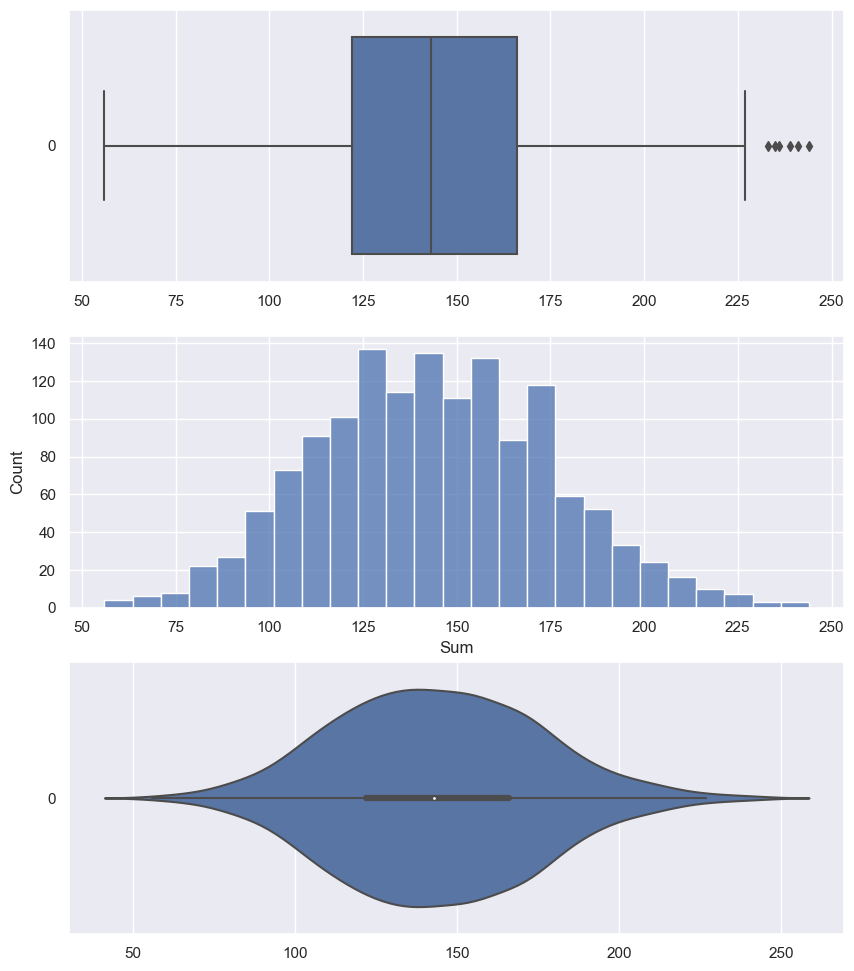

In [18]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = TotoData["Sum"], orient = "h", ax = axes[0])
sb.histplot(data = TotoData['Sum'], ax = axes[1])
sb.violinplot(data = TotoData['Sum'], orient = "h", ax = axes[2])

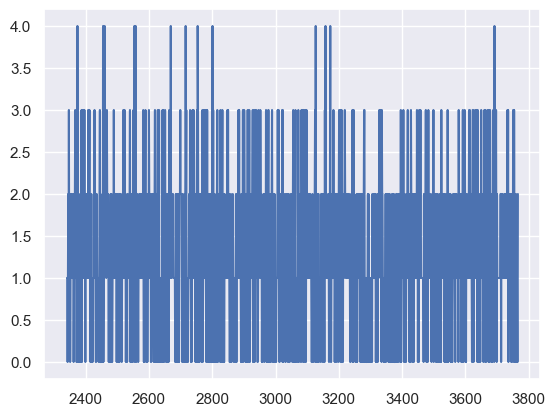

<Figure size 10000x2000 with 0 Axes>

In [19]:
No1 = TotoData[[" 1-10"]]
No2 = TotoData[[" 11-20"]]
No3 = TotoData[["NO_3"]]
No4 = TotoData[["NO_4"]]
No5 = TotoData[["NO_5"]]
No6 = TotoData[["NO_6"]]

x = TotoData[["Draw"]]

plt.plot(x, No1, label = 'Line 1')
# plt.plot(x, No2, label = 'Line 2')
# plt.plot(x, No3, label = 'Line 3')
# plt.plot(x, No4, label = 'Line 4')
# plt.plot(x, No5, label = 'Line 5')
# plt.plot(x, No6, label = 'Line 6')

f = plt.figure(figsize=(100, 20))
plt.show()

In [20]:
print(TotoData.columns[11])

 1-10
